In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.callbacks import Callback


# Custom callback to print training and testing accuracy
class AccuracyCallback(Callback):
    def __init__(self, x_train, y_train, x_test, y_test):
        super().__init__()
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test

    def on_epoch_end(self, epoch, logs=None):
        train_loss, train_accuracy = self.model.evaluate(self.x_train, self.y_train, verbose=0)
        test_loss, test_accuracy = self.model.evaluate(self.x_test, self.y_test, verbose=0)
        print(f"Epoch {epoch + 1}/{self.params['epochs']}, "
              f"Training Accuracy: {train_accuracy:.4f}, "
              f"Testing Accuracy: {test_accuracy:.4f}")

# Load your CSV file
file_path = r"C:\MAJOR PROJECT\NOTEBOOKmajorProject\featureAnalysis+classification\group1_single\read\all_read.csv"
df = pd.read_csv(file_path)

# Assuming your CSV file has columns/features and a target column named 'labels'
X = df.drop('labels', axis=1)
y = df['labels']

# Preprocess the data (standardization and label encoding)
scaler = StandardScaler()
X = scaler.fit_transform(X)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential([
    Dense(256, input_shape=(x_train.shape[1],), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0, callbacks=[AccuracyCallback(x_train, y_train, x_test, y_test)])

# Evaluate the model on training data to get final training accuracy
final_train_loss, final_train_accuracy = model.evaluate(x_train, y_train)
print("Final Training Accuracy:", final_train_accuracy)

# Evaluate the model on testing data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Final Testing Accuracy:", test_accuracy)






Epoch 1/100, Training Accuracy: 0.6076, Testing Accuracy: 0.6588
Epoch 2/100, Training Accuracy: 0.6457, Testing Accuracy: 0.6693
Epoch 3/100, Training Accuracy: 0.6621, Testing Accuracy: 0.6798
Epoch 4/100, Training Accuracy: 0.6680, Testing Accuracy: 0.6798
Epoch 5/100, Training Accuracy: 0.6804, Testing Accuracy: 0.6903
Epoch 6/100, Training Accuracy: 0.6903, Testing Accuracy: 0.6955
Epoch 7/100, Training Accuracy: 0.7041, Testing Accuracy: 0.6955
Epoch 8/100, Training Accuracy: 0.7133, Testing Accuracy: 0.7060
Epoch 9/100, Training Accuracy: 0.7093, Testing Accuracy: 0.7060
Epoch 10/100, Training Accuracy: 0.7139, Testing Accuracy: 0.7060
Epoch 11/100, Training Accuracy: 0.7290, Testing Accuracy: 0.7139
Epoch 12/100, Training Accuracy: 0.7257, Testing Accuracy: 0.7113
Epoch 13/100, Training Accuracy: 0.7218, Testing Accuracy: 0.7139
Epoch 14/100, Training Accuracy: 0.7303, Testing Accuracy: 0.7165
Epoch 15/100, Training Accuracy: 0.7244, Testing Accuracy: 0.7113
Epoch 16/100, T

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.callbacks import Callback

# Custom callback to print training and testing accuracy
class AccuracyCallback(Callback):
    def __init__(self, x_train, y_train, x_test, y_test):
        super().__init__()
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test

    def on_epoch_end(self, epoch, logs=None):
        train_loss, train_accuracy = self.model.evaluate(self.x_train, self.y_train, verbose=0)
        test_loss, test_accuracy = self.model.evaluate(self.x_test, self.y_test, verbose=0)
        print(f"Epoch {epoch + 1}/{self.params['epochs']}, "
              f"Training Accuracy: {train_accuracy:.4f}, "
              f"Testing Accuracy: {test_accuracy:.4f}")

# Load your CSV file
file_path = r"C:\MAJOR PROJECT\NOTEBOOKmajorProject\featureAnalysis+classification\group1_single\read\all_read.csv"

# Assuming your CSV file has columns/features and a target column named 'labels'
X = df.drop('labels', axis=1)
y = df['labels']

# Preprocess the data (standardization and label encoding)
scaler = StandardScaler()
X = scaler.fit_transform(X)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential([
    Dense(128, input_shape=(x_train.shape[1],), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])



# Train the model
history = model.fit(x_train, y_train, epochs=500, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model on training data to get final training accuracy
final_train_loss, final_train_accuracy = model.evaluate(x_train, y_train)
print("Final Training Accuracy:", final_train_accuracy)

# Evaluate the model on testing data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Final Testing Accuracy:", test_accuracy)


48/48 [==============================] - 0s 3ms/step - loss: 0.1765 - accuracy: 0.9843
Final Training Accuracy: 0.9842519760131836
12/12 [==============================] - 0s 2ms/step - loss: 0.3306 - accuracy: 0.9239
Final Testing Accuracy: 0.9238845109939575


In [7]:
#crow search algo
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.callbacks import Callback

# Custom callback to print training and testing accuracy
class AccuracyCallback(Callback):
    def init(self, x_train, y_train, x_test, y_test):
        super().init()
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test

    def on_epoch_end(self, epoch, logs=None):
        train_loss, train_accuracy = self.model.evaluate(self.x_train, self.y_train, verbose=0)
        test_loss, test_accuracy = self.model.evaluate(self.x_test, self.y_test, verbose=0)
        print(f"Epoch {epoch + 1}/{self.params['epochs']}, "
              f"Training Accuracy: {train_accuracy:.4f}, "
              f"Testing Accuracy: {test_accuracy:.4f}")

# Load your CSV file
file_path = r"C:\MAJOR PROJECT\NOTEBOOKmajorProject\featureAnalysis+classification\group1_single\read\all_read.csv"
df = pd.read_csv(file_path)

# Assuming your CSV file has columns/features and a target column named 'labels'
X = df.drop('labels', axis=1)
y = df['labels']

# Preprocess the data (standardization and label encoding)
scaler = StandardScaler()
X = scaler.fit_transform(X)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
# classifier instead of model
classifier = Sequential([
    Dense(128, input_shape=(x_train.shape[1],), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
classifier.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])



# Train the model
history = classifier.fit(x_train, y_train, epochs=300, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model on training data to get final training accuracy
final_train_loss, final_train_accuracy = classifier.evaluate(x_train, y_train)
print("Final Training Accuracy:", final_train_accuracy)

# Evaluate the model on testing data
test_loss, test_accuracy = classifier.evaluate(x_test, y_test)
print("Final Testing Accuracy:", test_accuracy)

48/48 [==============================] - 0s 3ms/step - loss: 0.1955 - accuracy: 0.9829
Final Training Accuracy: 0.9829396605491638
12/12 [==============================] - 0s 3ms/step - loss: 0.3620 - accuracy: 0.9186
Final Testing Accuracy: 0.9186351895332336


In [9]:
#CSA
def fitness(variables_values=[]):
    classifier = Sequential([
        Dense(128, input_shape=(x_train.shape[1],), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(len(label_encoder.classes_), activation='softmax')
    ])
    
    classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
   
    # Assuming you have already defined x_train, y_train, x_test, y_test, and label_encoder
    classifier.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
    test_loss, accuracy = classifier.evaluate(x_test, y_test)
    return accuracy

def initial_population(population_size = 30, min_values = [5,1], max_values = [120,3], target_function = fitness):
    population = np.zeros((population_size, len(min_values) + 1))
    for i in range(0, population_size):
        for j in range(0, len(min_values)):
            population[i,j] = random.uniform(min_values[j], max_values[j]) 
        population[i,-1] = target_function(population[i, 0:population.shape[1]-1])
    return population
def update_position(population, ap, fL, min_values = [5,1], max_values = [120,3], target_function = fitness):
    for i in range(0, population.shape[0]):
        idx  = [i for i in range(0, population.shape[0])]
        idx.remove(i)
        idx  = random.choice(idx)
        rand = int.from_bytes(os.urandom(8), byteorder = 'big') / ((1 << 64) - 1)
        for j in range(0, len(min_values)):
            if (rand >= ap):
                rand_i           = int.from_bytes(os.urandom(8), byteorder = 'big') / ((1 << 64) - 1)
                population[i, j] = np.clip(population[i, j] + rand_i*fL*( population[idx, j] - population[i, j]), min_values[j], max_values[j])
            else:
                population[i,j] = random.uniform(min_values[j], max_values[j]) 
        population[i,-1] = target_function(population[i, 0:population.shape[1]-1])
    return population

def crow_search_algorithm(population_size=30, ap=0.02, fL=2, min_values=[5, 1], max_values=[120, 3], iterations=30, target_function=fitness, stagnation_limit=10):
    rem = []
    count = 0
    stagnation_count = 0
    population = initial_population(population_size, min_values, max_values, target_function)
    best_ind = np.copy(population[population[:, -1].argsort()][0, :])
    best_fitness = best_ind[-1]
    
    while count <= iterations and stagnation_count < stagnation_limit:
        population = update_position(population, ap, fL, min_values, max_values, target_function)
        for i in range(0, population_size):
            value = np.copy(population[i, :])
            rem.append(value)
            if best_ind[-1] < value[-1]:
                best_ind = value
                best_fitness = value[-1]
                stagnation_count = 0
            else:
                stagnation_count += 1
        count += 1
        
    best_ind[1] = int(ceil(best_ind[1]))
    return best_ind, rem

In [10]:
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px  
from sklearn.metrics import accuracy_score 
from sklearn.metrics import recall_score 
from sklearn.utils import resample  
from math import * 
import math 
import random 
import os 

resultat_DNN=crow_search_algorithm()
resultat_DNN[0]#best position


12/12 [==============================] - 0s 4ms/step - loss: 0.4724 - accuracy: 0.9003


array([76.27840903,  3.        ,  0.90813649])

In [11]:
accuracy_DNN_withCSA=resultat_DNN[0][2]
accuracy_DNN_withCSA

0.9081364870071411

In [16]:
import time
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.callbacks import Callback

# Custom callback to print training and testing accuracy
class AccuracyCallback(Callback):
    def __init__(self, x_train, y_train, x_test, y_test):
        super().__init__()
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test

    def on_epoch_end(self, epoch, logs=None):
        train_loss, train_accuracy = self.model.evaluate(self.x_train, self.y_train, verbose=0)
        test_loss, test_accuracy = self.model.evaluate(self.x_test, self.y_test, verbose=0)
        print(f"Epoch {epoch + 1}/{self.params['epochs']}, "
              f"Training Accuracy: {train_accuracy:.4f}, "
              f"Testing Accuracy: {test_accuracy:.4f}")

# Load your CSV file
file_path = r"C:\MAJOR PROJECT\NOTEBOOKmajorProject\featureAnalysis+classification\group1_single\read\all_read.csv"

# Assuming your CSV file has columns/features and a target column named 'labels'
df = pd.read_csv(file_path)
X = df.drop('labels', axis=1)
y = df['labels']

# Preprocess the data (standardization and label encoding)
scaler = StandardScaler()
X = scaler.fit_transform(X)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential([
    Dense(128, input_shape=(x_train.shape[1],), activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Start time measurement for training
start_time = time.time()

# Train the model
history = model.fit(x_train, y_train, epochs=500, batch_size=32, validation_split=0.2, verbose=0)

# End time measurement for training
training_time = time.time() - start_time

# Start time measurement for evaluation on training data
start_time = time.time()

# Evaluate the model on training data to get final training accuracy
final_train_loss, final_train_accuracy = model.evaluate(x_train, y_train, verbose=0)

# End time measurement for evaluation on training data
training_evaluation_time = time.time() - start_time

print("Final Training Accuracy:", final_train_accuracy)

# Start time measurement for evaluation on testing data
start_time = time.time()

# Evaluate the model on testing data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

# End time measurement for evaluation on testing data
testing_time = time.time() - start_time

print("Final Testing Accuracy:", test_accuracy)

# Print the time taken for different phases
print("Time taken for training:", training_time)
print("Time taken for training evaluation:", training_evaluation_time)
print("Time taken for testing:", testing_time)


Final Training Accuracy: 0.9829396605491638
Final Testing Accuracy: 0.9212598204612732
Time taken for training: 96.21289539337158
Time taken for training evaluation: 0.1741347312927246
Time taken for testing: 0.11664676666259766


Epoch 1/350, Training Accuracy: 0.5177, Testing Accuracy: 0.5354
Epoch 2/350, Training Accuracy: 0.7001, Testing Accuracy: 0.6562
Epoch 3/350, Training Accuracy: 0.7264, Testing Accuracy: 0.6877
Epoch 4/350, Training Accuracy: 0.7487, Testing Accuracy: 0.7270
Epoch 5/350, Training Accuracy: 0.7592, Testing Accuracy: 0.7270
Epoch 6/350, Training Accuracy: 0.7559, Testing Accuracy: 0.7375
Epoch 7/350, Training Accuracy: 0.7585, Testing Accuracy: 0.7349
Epoch 8/350, Training Accuracy: 0.7638, Testing Accuracy: 0.7559
Epoch 9/350, Training Accuracy: 0.7717, Testing Accuracy: 0.7480
Epoch 10/350, Training Accuracy: 0.7723, Testing Accuracy: 0.7559
Epoch 11/350, Training Accuracy: 0.7802, Testing Accuracy: 0.7612
Epoch 12/350, Training Accuracy: 0.7887, Testing Accuracy: 0.7795
Epoch 13/350, Training Accuracy: 0.7946, Testing Accuracy: 0.7795
Epoch 14/350, Training Accuracy: 0.8051, Testing Accuracy: 0.7927
Epoch 15/350, Training Accuracy: 0.8130, Testing Accuracy: 0.8005
Epoch 16/350, Train

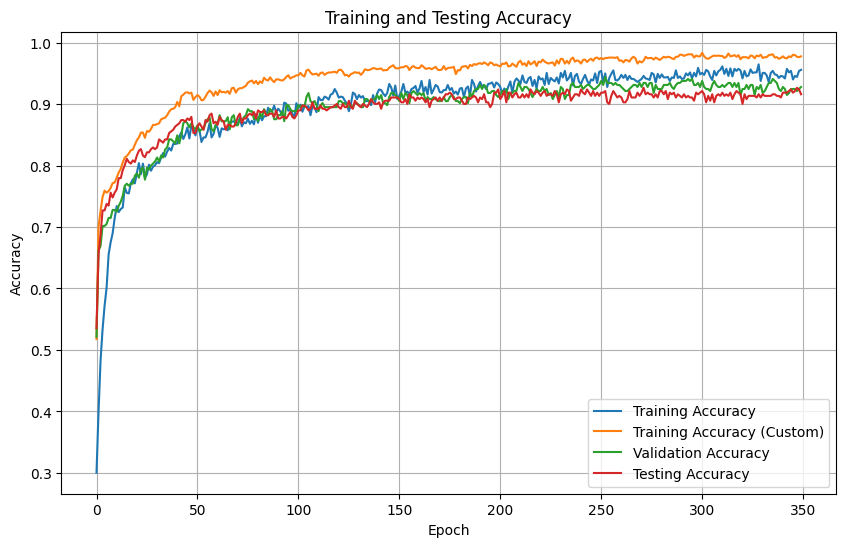

In [18]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.callbacks import Callback

# Custom callback to print training and testing accuracy
class AccuracyCallback(Callback):
    def __init__(self, x_train, y_train, x_test, y_test):
        super().__init__()
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.train_accuracy = []
        self.test_accuracy = []

    def on_epoch_end(self, epoch, logs=None):
        train_loss, train_accuracy = self.model.evaluate(self.x_train, self.y_train, verbose=0)
        test_loss, test_accuracy = self.model.evaluate(self.x_test, self.y_test, verbose=0)
        self.train_accuracy.append(train_accuracy)
        self.test_accuracy.append(test_accuracy)
        print(f"Epoch {epoch + 1}/{self.params['epochs']}, "
              f"Training Accuracy: {train_accuracy:.4f}, "
              f"Testing Accuracy: {test_accuracy:.4f}")

# Load your CSV file
file_path = r"C:\MAJOR PROJECT\NOTEBOOKmajorProject\featureAnalysis+classification\group1_single\read\all_read.csv"

# Assuming your CSV file has columns/features and a target column named 'labels'
df = pd.read_csv(file_path)
X = df.drop('labels', axis=1)
y = df['labels']

# Preprocess the data (standardization and label encoding)
scaler = StandardScaler()
X = scaler.fit_transform(X)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential([
    Dense(128, input_shape=(x_train.shape[1],), activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Custom callback for accuracy tracking
accuracy_callback = AccuracyCallback(x_train, y_train, x_test, y_test)

# Start time measurement for training
start_time = time.time()

# Train the model
history = model.fit(x_train, y_train, epochs=350, batch_size=32, validation_split=0.2, verbose=0, callbacks=[accuracy_callback])

# End time measurement for training
training_time = time.time() - start_time

# Evaluate the model on training data to get final training accuracy
final_train_loss, final_train_accuracy = model.evaluate(x_train, y_train, verbose=0)

print("Final Training Accuracy:", final_train_accuracy)

# Evaluate the model on testing data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print("Final Testing Accuracy:", test_accuracy)

# Print the time taken for different phases
print("Time taken for training:", training_time)

# Plotting the training and testing accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(accuracy_callback.train_accuracy, label='Training Accuracy (Custom)')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(accuracy_callback.test_accuracy, label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [19]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import classification_report

# Custom callback to print training and testing accuracy
class AccuracyCallback(Callback):
    def __init__(self, x_train, y_train, x_test, y_test):
        super().__init__()
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.train_accuracy = []
        self.test_accuracy = []

    def on_epoch_end(self, epoch, logs=None):
        train_loss, train_accuracy = self.model.evaluate(self.x_train, self.y_train, verbose=0)
        test_loss, test_accuracy = self.model.evaluate(self.x_test, self.y_test, verbose=0)
        self.train_accuracy.append(train_accuracy)
        self.test_accuracy.append(test_accuracy)
        print(f"Epoch {epoch + 1}/{self.params['epochs']}, "
              f"Training Accuracy: {train_accuracy:.4f}, "
              f"Testing Accuracy: {test_accuracy:.4f}")

# Load your CSV file
file_path = r"C:\MAJOR PROJECT\NOTEBOOKmajorProject\featureAnalysis+classification\group1_single\read\all_read.csv"

# Assuming your CSV file has columns/features and a target column named 'labels'
df = pd.read_csv(file_path)
X = df.drop('labels', axis=1)
y = df['labels']

# Preprocess the data (standardization and label encoding)
scaler = StandardScaler()
X = scaler.fit_transform(X)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential([
    Dense(128, input_shape=(x_train.shape[1],), activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Custom callback for accuracy tracking
accuracy_callback = AccuracyCallback(x_train, y_train, x_test, y_test)

# Start time measurement for training
start_time = time.time()

# Train the model
history = model.fit(x_train, y_train, epochs=500, batch_size=32, validation_split=0.2, verbose=0, callbacks=[accuracy_callback])

# End time measurement for training
training_time = time.time() - start_time

# Evaluate the model on training data to get final training accuracy
final_train_loss, final_train_accuracy = model.evaluate(x_train, y_train, verbose=0)

print("Final Training Accuracy:", final_train_accuracy)

# Evaluate the model on testing data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print("Final Testing Accuracy:", test_accuracy)

# Print the time taken for different phases
print("Time taken for training:", training_time)

# Calculate additional metrics
y_pred = model.predict_classes(x_test)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)

# Parse the classification report to get values of precision, recall, MCC, specificity, sensitivity, and F1 score
precision_recall = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)

for label, metrics in precision_recall.items():
    if label != 'accuracy':
        print(f"\nLabel: {label}")
        print(f"Precision: {metrics['precision']:.4f}")
        print(f"Recall: {metrics['recall']:.4f}")
        print(f"F1 Score: {metrics['f1-score']:.4f}")

# Plotting the training and testing accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(accuracy_callback.train_accuracy, label='Training Accuracy (Custom)')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(accuracy_callback.test_accuracy, label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/500, Training Accuracy: 0.5991, Testing Accuracy: 0.5984
Epoch 2/500, Training Accuracy: 0.6988, Testing Accuracy: 0.6693
Epoch 3/500, Training Accuracy: 0.7323, Testing Accuracy: 0.7139
Epoch 4/500, Training Accuracy: 0.7415, Testing Accuracy: 0.7244
Epoch 5/500, Training Accuracy: 0.7507, Testing Accuracy: 0.7323
Epoch 6/500, Training Accuracy: 0.7520, Testing Accuracy: 0.7349
Epoch 7/500, Training Accuracy: 0.7592, Testing Accuracy: 0.7375
Epoch 8/500, Training Accuracy: 0.7625, Testing Accuracy: 0.7533
Epoch 9/500, Training Accuracy: 0.7684, Testing Accuracy: 0.7507
Epoch 10/500, Training Accuracy: 0.7730, Testing Accuracy: 0.7612
Epoch 11/500, Training Accuracy: 0.7769, Testing Accuracy: 0.7638
Epoch 12/500, Training Accuracy: 0.7841, Testing Accuracy: 0.7717
Epoch 13/500, Training Accuracy: 0.7946, Testing Accuracy: 0.7769
Epoch 14/500, Training Accuracy: 0.7986, Testing Accuracy: 0.7769
Epoch 15/500, Training Accuracy: 0.8018, Testing Accuracy: 0.7795
Epoch 16/500, Train

AttributeError: 'Sequential' object has no attribute 'predict_classes'

Epoch 1/350, Training Accuracy: 0.6240, Testing Accuracy: 0.6220
Epoch 2/350, Training Accuracy: 0.6568, Testing Accuracy: 0.6562
Epoch 3/350, Training Accuracy: 0.7093, Testing Accuracy: 0.7139
Epoch 4/350, Training Accuracy: 0.7402, Testing Accuracy: 0.7323
Epoch 5/350, Training Accuracy: 0.7520, Testing Accuracy: 0.7402
Epoch 6/350, Training Accuracy: 0.7579, Testing Accuracy: 0.7402
Epoch 7/350, Training Accuracy: 0.7657, Testing Accuracy: 0.7428
Epoch 8/350, Training Accuracy: 0.7782, Testing Accuracy: 0.7507
Epoch 9/350, Training Accuracy: 0.7808, Testing Accuracy: 0.7533
Epoch 10/350, Training Accuracy: 0.7867, Testing Accuracy: 0.7690
Epoch 11/350, Training Accuracy: 0.7979, Testing Accuracy: 0.7743
Epoch 12/350, Training Accuracy: 0.8110, Testing Accuracy: 0.7874
Epoch 13/350, Training Accuracy: 0.8156, Testing Accuracy: 0.7953
Epoch 14/350, Training Accuracy: 0.8077, Testing Accuracy: 0.7795
Epoch 15/350, Training Accuracy: 0.8196, Testing Accuracy: 0.7848
Epoch 16/350, Train

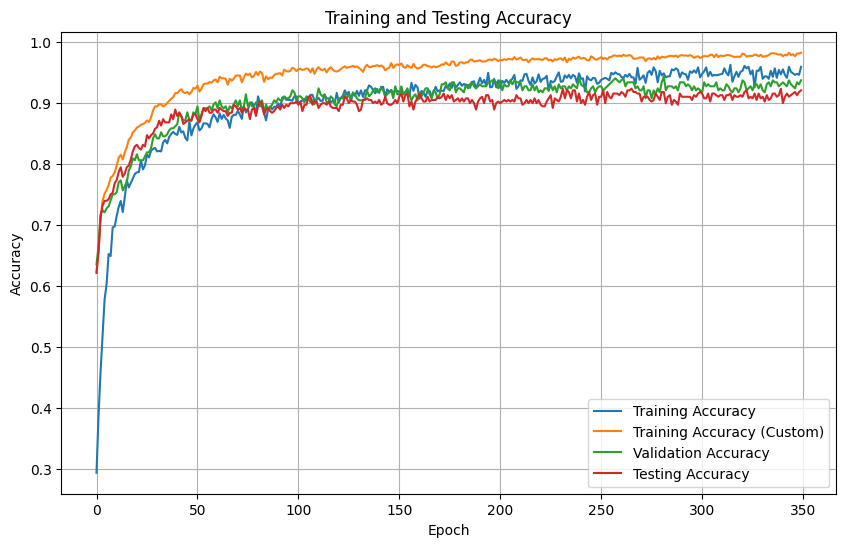

In [25]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import classification_report

# Custom callback to print training and testing accuracy
class AccuracyCallback(Callback):
    def __init__(self, x_train, y_train, x_test, y_test):
        super().__init__()
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.train_accuracy = []
        self.test_accuracy = []

    def on_epoch_end(self, epoch, logs=None):
        train_loss, train_accuracy = self.model.evaluate(self.x_train, self.y_train, verbose=0)
        test_loss, test_accuracy = self.model.evaluate(self.x_test, self.y_test, verbose=0)
        self.train_accuracy.append(train_accuracy)
        self.test_accuracy.append(test_accuracy)
        print(f"Epoch {epoch + 1}/{self.params['epochs']}, "
              f"Training Accuracy: {train_accuracy:.4f}, "
              f"Testing Accuracy: {test_accuracy:.4f}")

# Load your CSV file
file_path = r"C:\MAJOR PROJECT\NOTEBOOKmajorProject\featureAnalysis+classification\group1_single\read\all_read.csv"

# Assuming your CSV file has columns/features and a target column named 'labels'
df = pd.read_csv(file_path)
X = df.drop('labels', axis=1)
y = df['labels']

# Preprocess the data (standardization and label encoding)
scaler = StandardScaler()
X = scaler.fit_transform(X)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential([
    Dense(128, input_shape=(x_train.shape[1],), activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Custom callback for accuracy tracking
accuracy_callback = AccuracyCallback(x_train, y_train, x_test, y_test)

# Start time measurement for training
start_time = time.time()

# Train the model
history = model.fit(x_train, y_train, epochs=350, batch_size=32, validation_split=0.2, verbose=0, callbacks=[accuracy_callback])

# End time measurement for training
training_time = time.time() - start_time

# Evaluate the model on training data to get final training accuracy
final_train_loss, final_train_accuracy = model.evaluate(x_train, y_train, verbose=0)

print("Final Training Accuracy:", final_train_accuracy)

# Evaluate the model on testing data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print("Final Testing Accuracy:", test_accuracy)

# Print the time taken for different phases
print("Time taken for training:", training_time)

# Calculate additional metrics
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
# report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
# print("Classification Report:")
# print(report)

# Parse the classification report to get values of precision, recall, MCC, specificity, sensitivity, and F1 score
precision_recall = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)

for label, metrics in precision_recall.items():
    if label != 'accuracy':
        print(f"\nLabel: {label}")
        print(f"Precision: {metrics['precision']:.4f}")
        print(f"Recall: {metrics['recall']:.4f}")
        print(f"F1 Score: {metrics['f1-score']:.4f}")

# Plotting the training and testing accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(accuracy_callback.train_accuracy, label='Training Accuracy (Custom)')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(accuracy_callback.test_accuracy, label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/350, Training Accuracy: 0.5994, Testing Accuracy: 0.5975
Epoch 2/350, Training Accuracy: 0.6931, Testing Accuracy: 0.6800
Epoch 3/350, Training Accuracy: 0.7088, Testing Accuracy: 0.6950
Epoch 4/350, Training Accuracy: 0.7163, Testing Accuracy: 0.7075
Epoch 5/350, Training Accuracy: 0.7231, Testing Accuracy: 0.7250
Epoch 6/350, Training Accuracy: 0.7337, Testing Accuracy: 0.7275
Epoch 7/350, Training Accuracy: 0.7437, Testing Accuracy: 0.7250
Epoch 8/350, Training Accuracy: 0.7494, Testing Accuracy: 0.7275
Epoch 9/350, Training Accuracy: 0.7538, Testing Accuracy: 0.7400
Epoch 10/350, Training Accuracy: 0.7588, Testing Accuracy: 0.7425
Epoch 11/350, Training Accuracy: 0.7706, Testing Accuracy: 0.7575
Epoch 12/350, Training Accuracy: 0.7769, Testing Accuracy: 0.7575
Epoch 13/350, Training Accuracy: 0.7887, Testing Accuracy: 0.7700
Epoch 14/350, Training Accuracy: 0.7931, Testing Accuracy: 0.7700
Epoch 15/350, Training Accuracy: 0.8019, Testing Accuracy: 0.7825
Epoch 16/350, Train

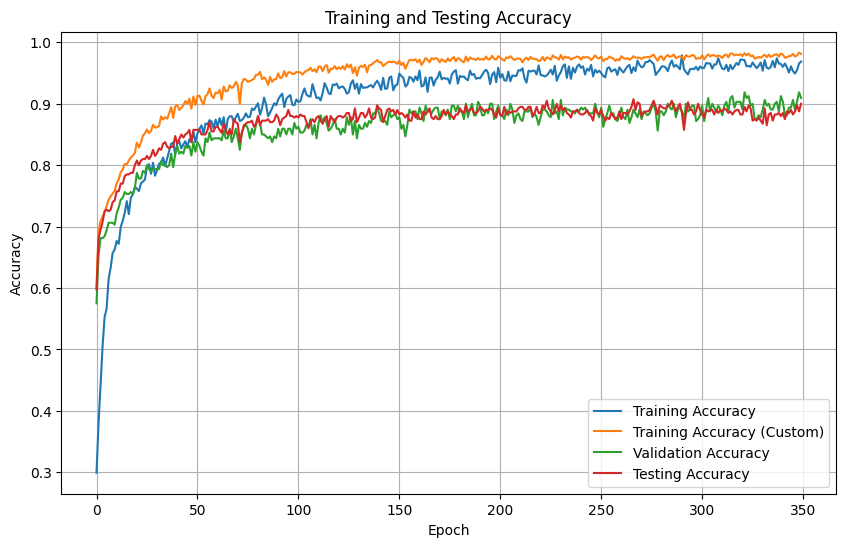

In [4]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import classification_report

# Custom callback to print training and testing accuracy
class AccuracyCallback(Callback):
    def __init__(self, x_train, y_train, x_test, y_test):
        super().__init__()
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.train_accuracy = []
        self.test_accuracy = []

    def on_epoch_end(self, epoch, logs=None):
        train_loss, train_accuracy = self.model.evaluate(self.x_train, self.y_train, verbose=0)
        test_loss, test_accuracy = self.model.evaluate(self.x_test, self.y_test, verbose=0)
        self.train_accuracy.append(train_accuracy)
        self.test_accuracy.append(test_accuracy)
        print(f"Epoch {epoch + 1}/{self.params['epochs']}, "
              f"Training Accuracy: {train_accuracy:.4f}, "
              f"Testing Accuracy: {test_accuracy:.4f}")

# Load your CSV file
file_path = r"C:\MAJOR PROJECT\NOTEBOOKmajorProject\featureAnalysis+classification\group1_single\spon\allSpon.csv"

# Assuming your CSV file has columns/features and a target column named 'labels'
df = pd.read_csv(file_path)
X = df.drop('labels', axis=1)
y = df['labels']

# Preprocess the data (standardization and label encoding)
scaler = StandardScaler()
X = scaler.fit_transform(X)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential([
    Dense(128, input_shape=(x_train.shape[1],), activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Custom callback for accuracy tracking
accuracy_callback = AccuracyCallback(x_train, y_train, x_test, y_test)

# Start time measurement for training
start_time = time.time()

# Train the model
history = model.fit(x_train, y_train, epochs=350, batch_size=32, validation_split=0.2, verbose=0, callbacks=[accuracy_callback])

# End time measurement for training
training_time = time.time() - start_time

# Evaluate the model on training data to get final training accuracy
final_train_loss, final_train_accuracy = model.evaluate(x_train, y_train, verbose=0)

print("Final Training Accuracy:", final_train_accuracy)

# Evaluate the model on testing data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print("Final Testing Accuracy:", test_accuracy)

# Print the time taken for different phases
print("Time taken for training:", training_time)

# Calculate additional metrics
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
# report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
# print("Classification Report:")
# print(report)

# Parse the classification report to get values of precision, recall, MCC, specificity, sensitivity, and F1 score
precision_recall = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)

for label, metrics in precision_recall.items():
    if label != 'accuracy':
        print(f"\nLabel: {label}")
        print(f"Precision: {metrics['precision']:.4f}")
        print(f"Recall: {metrics['recall']:.4f}")
        print(f"F1 Score: {metrics['f1-score']:.4f}")


# Calculate accuracy for each label
label_accuracies = {}
for label in label_encoder.classes_:
    label_indices = np.where(label_encoder.inverse_transform(y_test) == label)[0]
    label_predictions = y_pred[label_indices]
    label_true = y_test[label_indices]
    label_accuracy = np.mean(label_predictions == label_true)
    label_accuracies[label] = label_accuracy

# Print accuracy for each label
for label, accuracy in label_accuracies.items():
    print(f"Label: {label}, Accuracy: {accuracy:.4f}")

# Plotting the training and testing accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(accuracy_callback.train_accuracy, label='Training Accuracy (Custom)')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(accuracy_callback.test_accuracy, label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import classification_report

# Custom callback to print training and testing accuracy
class AccuracyCallback(Callback):
    def __init__(self, x_train, y_train, x_test, y_test):
        super().__init__()
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.train_accuracy = []
        self.test_accuracy = []

    def on_epoch_end(self, epoch, logs=None):
        train_loss, train_accuracy = self.model.evaluate(self.x_train, self.y_train, verbose=0)
        test_loss, test_accuracy = self.model.evaluate(self.x_test, self.y_test, verbose=0)
        self.train_accuracy.append(train_accuracy)
        self.test_accuracy.append(test_accuracy)
        print(f"Epoch {epoch + 1}/{self.params['epochs']}, "
              f"Training Accuracy: {train_accuracy:.4f}, "
              f"Testing Accuracy: {test_accuracy:.4f}")

# Load your CSV file
file_path = r"C:\MAJOR PROJECT\NOTEBOOKmajorProject\featureAnalysis+classification\group1_single\read\all_read.csv"

# Assuming your CSV file has columns/features and a target column named 'labels'
df = pd.read_csv(file_path)
X = df.drop('labels', axis=1)
y = df['labels']

# Preprocess the data (standardization and label encoding)
scaler = StandardScaler()
X = scaler.fit_transform(X)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential([
    Dense(128, input_shape=(x_train.shape[1],), activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Custom callback for accuracy tracking
accuracy_callback = AccuracyCallback(x_train, y_train, x_test, y_test)

# Start time measurement for training
start_time = time.time()

# Train the model
history = model.fit(x_train, y_train, epochs=350, batch_size=32, validation_split=0.2, verbose=0, callbacks=[accuracy_callback])

# End time measurement for training
training_time = time.time() - start_time

# Evaluate the model on training data to get final training accuracy
final_train_loss, final_train_accuracy = model.evaluate(x_train, y_train, verbose=0)

print("Final Training Accuracy:", final_train_accuracy)

# Evaluate the model on testing data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print("Final Testing Accuracy:", test_accuracy)

# Print the time taken for different phases
print("Time taken for training:", training_time)

# Calculate additional metrics
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
# report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
# print("Classification Report:")
# print(report)

# Parse the classification report to get values of precision, recall, MCC, specificity, sensitivity, and F1 score
precision_recall = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)

for label, metrics in precision_recall.items():
    if label != 'accuracy':
        print(f"\nLabel: {label}")
        print(f"Precision: {metrics['precision']:.4f}")
        print(f"Recall: {metrics['recall']:.4f}")
        print(f"F1 Score: {metrics['f1-score']:.4f}")


# Calculate accuracy for each label
label_accuracies = {}
for label in label_encoder.classes_:
    label_indices = np.where(label_encoder.inverse_transform(y_test) == label)[0]
    label_predictions = y_pred[label_indices]
    label_true = y_test[label_indices]
    label_accuracy = np.mean(label_predictions == label_true)
    label_accuracies[label] = label_accuracy

# Print accuracy for each label
for label, accuracy in label_accuracies.items():
    print(f"Label: {label}, Accuracy: {accuracy:.4f}")

# Plotting the training and testing accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(accuracy_callback.train_accuracy, label='Training Accuracy (Custom)')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(accuracy_callback.test_accuracy, label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/350, Training Accuracy: 0.6597, Testing Accuracy: 0.6556
Epoch 2/350, Training Accuracy: 0.6911, Testing Accuracy: 0.6837
Epoch 3/350, Training Accuracy: 0.7097, Testing Accuracy: 0.6965
Epoch 4/350, Training Accuracy: 0.7180, Testing Accuracy: 0.7093
Epoch 5/350, Training Accuracy: 0.7257, Testing Accuracy: 0.7106
Epoch 6/350, Training Accuracy: 0.7244, Testing Accuracy: 0.7209
Epoch 7/350, Training Accuracy: 0.7404, Testing Accuracy: 0.7311
Epoch 8/350, Training Accuracy: 0.7513, Testing Accuracy: 0.7375
Epoch 9/350, Training Accuracy: 0.7545, Testing Accuracy: 0.7503
Epoch 10/350, Training Accuracy: 0.7634, Testing Accuracy: 0.7490
Epoch 11/350, Training Accuracy: 0.7737, Testing Accuracy: 0.7644
Epoch 12/350, Training Accuracy: 0.7775, Testing Accuracy: 0.7644
Epoch 13/350, Training Accuracy: 0.7814, Testing Accuracy: 0.7721
Epoch 14/350, Training Accuracy: 0.7903, Testing Accuracy: 0.7772
Epoch 15/350, Training Accuracy: 0.8044, Testing Accuracy: 0.7798
Epoch 16/350, Train

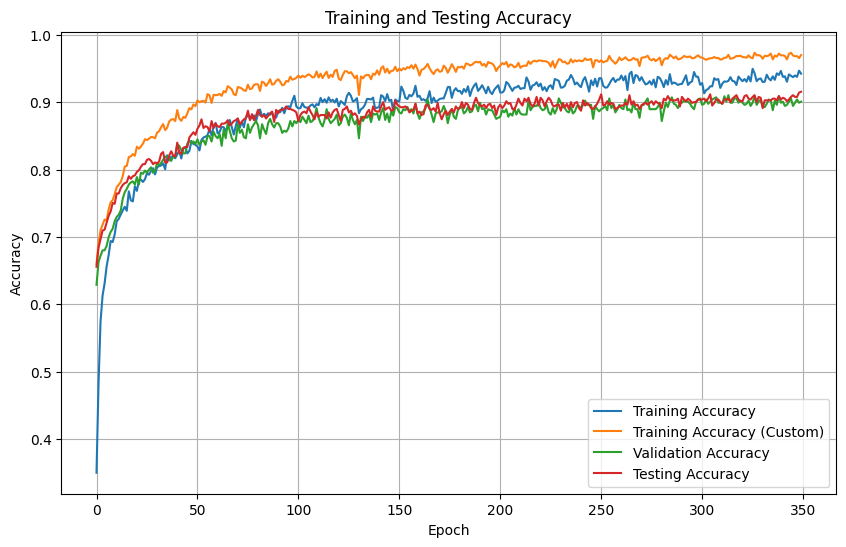

In [12]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import classification_report

# Custom callback to print training and testing accuracy
class AccuracyCallback(Callback):
    def __init__(self, x_train, y_train, x_test, y_test):
        super().__init__()
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.train_accuracy = []
        self.test_accuracy = []

    def on_epoch_end(self, epoch, logs=None):
        train_loss, train_accuracy = self.model.evaluate(self.x_train, self.y_train, verbose=0)
        test_loss, test_accuracy = self.model.evaluate(self.x_test, self.y_test, verbose=0)
        self.train_accuracy.append(train_accuracy)
        self.test_accuracy.append(test_accuracy)
        print(f"Epoch {epoch + 1}/{self.params['epochs']}, "
              f"Training Accuracy: {train_accuracy:.4f}, "
              f"Testing Accuracy: {test_accuracy:.4f}")

# Load your CSV file
file_path = r"C:\MAJOR PROJECT\NOTEBOOKmajorProject\featureAnalysis+classification\read+spon_final.csv"

# Assuming your CSV file has columns/features and a target column named 'labels'
df = pd.read_csv(file_path)
X = df.drop('labels', axis=1)
y = df['labels']

# Preprocess the data (standardization and label encoding)
scaler = StandardScaler()
X = scaler.fit_transform(X)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential([
    Dense(128, input_shape=(x_train.shape[1],), activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Custom callback for accuracy tracking
accuracy_callback = AccuracyCallback(x_train, y_train, x_test, y_test)

# Start time measurement for training
start_time = time.time()

# Train the model
history = model.fit(x_train, y_train, epochs=350, batch_size=32, validation_split=0.2, verbose=0, callbacks=[accuracy_callback])

# End time measurement for training
training_time = time.time() - start_time

# Evaluate the model on training data to get final training accuracy
final_train_loss, final_train_accuracy = model.evaluate(x_train, y_train, verbose=0)

print("Final Training Accuracy:", final_train_accuracy)

# Evaluate the model on testing data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print("Final Testing Accuracy:", test_accuracy)

# Print the time taken for different phases
print("Time taken for training:", training_time)

# Calculate additional metrics
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Parse the classification report to get values of precision, recall, MCC, specificity, sensitivity, and F1 score
precision_recall = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)

for label, metrics in precision_recall.items():
    if label != 'accuracy':
        print(f"\nLabel: {label}")
        print(f"Precision: {metrics['precision']:.4f}")
        print(f"Recall: {metrics['recall']:.4f}")
        print(f"F1 Score: {metrics['f1-score']:.4f}")


# Plotting the training and testing accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(accuracy_callback.train_accuracy, label='Training Accuracy (Custom)')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(accuracy_callback.test_accuracy, label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/500, Training Accuracy: 0.6617, Testing Accuracy: 0.6722
Epoch 2/500, Training Accuracy: 0.7087, Testing Accuracy: 0.7042
Epoch 3/500, Training Accuracy: 0.7215, Testing Accuracy: 0.7209
Epoch 4/500, Training Accuracy: 0.7266, Testing Accuracy: 0.7196
Epoch 5/500, Training Accuracy: 0.7343, Testing Accuracy: 0.7247
Epoch 6/500, Training Accuracy: 0.7353, Testing Accuracy: 0.7298
Epoch 7/500, Training Accuracy: 0.7404, Testing Accuracy: 0.7324
Epoch 8/500, Training Accuracy: 0.7481, Testing Accuracy: 0.7362
Epoch 9/500, Training Accuracy: 0.7519, Testing Accuracy: 0.7362
Epoch 10/500, Training Accuracy: 0.7631, Testing Accuracy: 0.7516
Epoch 11/500, Training Accuracy: 0.7695, Testing Accuracy: 0.7554
Epoch 12/500, Training Accuracy: 0.7769, Testing Accuracy: 0.7670
Epoch 13/500, Training Accuracy: 0.7859, Testing Accuracy: 0.7734
Epoch 14/500, Training Accuracy: 0.7897, Testing Accuracy: 0.7823
Epoch 15/500, Training Accuracy: 0.7996, Testing Accuracy: 0.7849
Epoch 16/500, Train

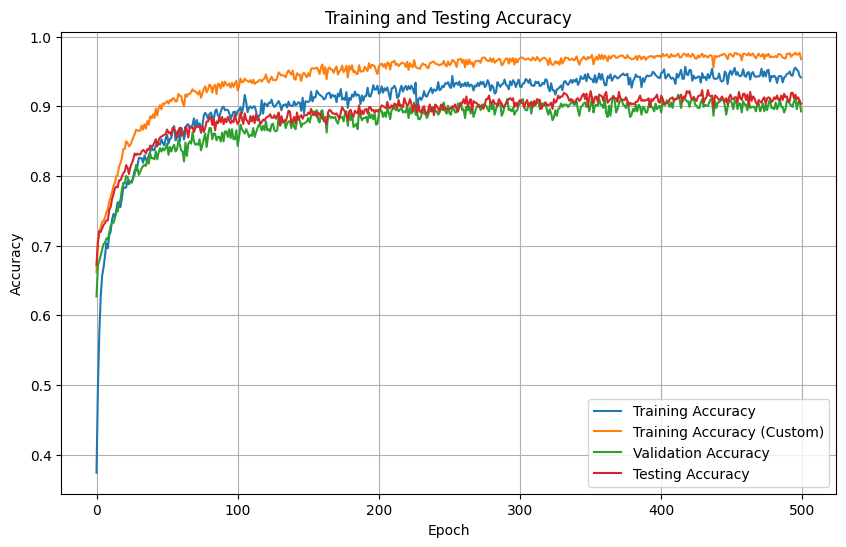

In [13]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import classification_report

# Custom callback to print training and testing accuracy
class AccuracyCallback(Callback):
    def __init__(self, x_train, y_train, x_test, y_test):
        super().__init__()
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.train_accuracy = []
        self.test_accuracy = []

    def on_epoch_end(self, epoch, logs=None):
        train_loss, train_accuracy = self.model.evaluate(self.x_train, self.y_train, verbose=0)
        test_loss, test_accuracy = self.model.evaluate(self.x_test, self.y_test, verbose=0)
        self.train_accuracy.append(train_accuracy)
        self.test_accuracy.append(test_accuracy)
        print(f"Epoch {epoch + 1}/{self.params['epochs']}, "
              f"Training Accuracy: {train_accuracy:.4f}, "
              f"Testing Accuracy: {test_accuracy:.4f}")

# Load your CSV file
file_path = r"C:\MAJOR PROJECT\NOTEBOOKmajorProject\featureAnalysis+classification\read+spon_final.csv"

# Assuming your CSV file has columns/features and a target column named 'labels'
df = pd.read_csv(file_path)
X = df.drop('labels', axis=1)
y = df['labels']

# Preprocess the data (standardization and label encoding)
scaler = StandardScaler()
X = scaler.fit_transform(X)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential([
    Dense(128, input_shape=(x_train.shape[1],), activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Custom callback for accuracy tracking
accuracy_callback = AccuracyCallback(x_train, y_train, x_test, y_test)

# Start time measurement for training
start_time = time.time()

# Train the model
history = model.fit(x_train, y_train, epochs=500, batch_size=32, validation_split=0.2, verbose=0, callbacks=[accuracy_callback])

# End time measurement for training
training_time = time.time() - start_time

# Evaluate the model on training data to get final training accuracy
final_train_loss, final_train_accuracy = model.evaluate(x_train, y_train, verbose=0)

print("Final Training Accuracy:", final_train_accuracy)

# Evaluate the model on testing data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print("Final Testing Accuracy:", test_accuracy)

# Print the time taken for different phases
print("Time taken for training:", training_time)

# Calculate additional metrics
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Parse the classification report to get values of precision, recall, MCC, specificity, sensitivity, and F1 score
precision_recall = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)

for label, metrics in precision_recall.items():
    if label != 'accuracy':
        print(f"\nLabel: {label}")
        print(f"Precision: {metrics['precision']:.4f}")
        print(f"Recall: {metrics['recall']:.4f}")
        print(f"F1 Score: {metrics['f1-score']:.4f}")


# Plotting the training and testing accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(accuracy_callback.train_accuracy, label='Training Accuracy (Custom)')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(accuracy_callback.test_accuracy, label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


(3905, 197)


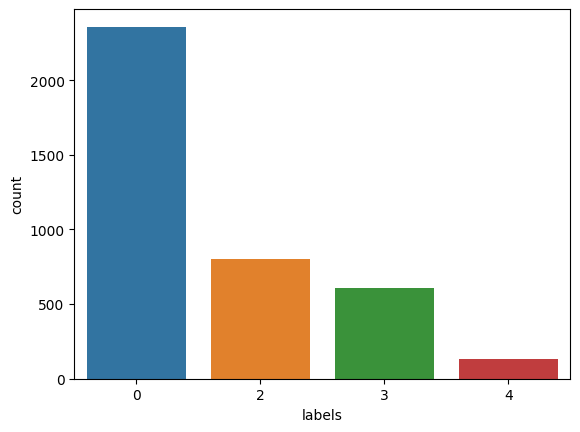

In [15]:
import seaborn as sns
print(df.shape)
ax = sns.countplot(x="labels", data=df)